# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></div><div class="lev1 toc-item"><a href="#Perform-calculations" data-toc-modified-id="Perform-calculations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Perform calculations</a></div><div class="lev2 toc-item"><a href="#Level-1-concatenation-and-sanity-check" data-toc-modified-id="Level-1-concatenation-and-sanity-check-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Level 1 concatenation and sanity check</a></div><div class="lev2 toc-item"><a href="#Level-2-xCO2-to-fCO2-calculations" data-toc-modified-id="Level-2-xCO2-to-fCO2-calculations-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Level 2 xCO2 to fCO2 calculations</a></div><div class="lev2 toc-item"><a href="#QC-flagging-and-diagnostic-plots" data-toc-modified-id="QC-flagging-and-diagnostic-plots-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>QC flagging and diagnostic plots</a></div><div class="lev1 toc-item"><a href="#Oceanic-fCO2-estimated-in-Python-is-nearly-exactly-the-same-as-MATLAB" data-toc-modified-id="Oceanic-fCO2-estimated-in-Python-is-nearly-exactly-the-same-as-MATLAB-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Oceanic fCO2 estimated in Python is nearly exactly the same as MATLAB</a></div><div class="lev1 toc-item"><a href="#Why-is-atmospheric-CO2-different?" data-toc-modified-id="Why-is-atmospheric-CO2-different?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Why is atmospheric CO2 different?</a></div><div class="lev2 toc-item"><a href="#There-is-a-positive-bias-in-the-Python-fCO2:-Pressure-height-correction" data-toc-modified-id="There-is-a-positive-bias-in-the-Python-fCO2:-Pressure-height-correction-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>There is a positive bias in the Python fCO2: Pressure height correction</a></div><div class="lev2 toc-item"><a href="#xCO2-differences-driven-by-scatter-in-the-ATM-measurements" data-toc-modified-id="xCO2-differences-driven-by-scatter-in-the-ATM-measurements-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>xCO2 differences driven by scatter in the ATM measurements</a></div>

In [14]:
%pylab inline
import pandas as pd
import seaborn as sns

sys.path.append('../UnderWay_pCO2_Scripts/')
import level0_to_level1 as lev0to1
import level1_to_level2_lg as lev1to2
import diagnostic_plots as diag_plots

from importlib import reload

sns.set_style('whitegrid')
rcParams['figure.figsize'] = [12, 6]
rcParams['font.size'] = 12
rcParams['figure.dpi'] = 150
rcParams['savefig.dpi'] = 150

Populating the interactive namespace from numpy and matplotlib


/Users/luke/Development/miniConda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Import data

In [55]:
fname_mtlb = '../../SOCCO_pCO2/SOCAT_SUBMITION/data_0.9/SANAE 50 L4_socat_0.9.csv'
fname_mtlb = './SANAE50 L4_Working.csv'

foldr_pyth = '../Level_0/2010_SANAE50/'
figure_sname = './test_comparefCO2_MATLABwrk-Python_SANAE50-L4_calib_interp.png'

In [56]:
mtlb = pd.read_csv(fname_mtlb, sep=';', parse_dates={'DateTime2': [2,4]},  dayfirst=True, index_col='DateTime2')
# mtlb = pd.read_csv(fname_mtlb, parse_dates={'DateTime2': [4, 5]},  dayfirst=True, index_col='DateTime2')
# getting the date range from MATLAB output 
# These are generally shorter than for python as the latter reads the entire folder
t0, tn = mtlb.iloc[[0, -1]].index.to_native_types()

mtlb = lev1to2.UnderwayCO2(mtlb)

# Perform calculations

## Level 1 concatenation and sanity check

In [149]:
df1a = lev0to1.concat_co2_files(foldr_pyth)
df1b = lev1to2.UnderwayCO2(df1a.loc[t0 : tn])


1. IMPORTING DATA
1.1 - Reading 110 files from ../Level_0/2010_SANAE50/


In [162]:
lev0to1.expected_ranges.update({
    'Lat': [-75, -25],
    'Lon': [-50, 40],
})

lev0to1.sanity_checker(df1a)

1.2 - Sanity check: points within ranges
|------------------|--------------|---------|
|       NAME       |    RANGE     |   PCT   |
|------------------|--------------|---------|
| CO2x             |     0 : 4000 |    99.36|
| Lat              | -  75 :-  25 |    99.87|
| Lon              | -  50 :   40 |   100.00|
| Pres_atm_hpa     |   800 : 1200 |    99.00|
| Temp_intake      | -   2 :   35 |    99.65|
| Salt_tsg         |    25 :   38 |    97.38|
| Pres_equ_hpa     | -  10 :   10 |    99.83|
| Temp_equ         | -   2 :   35 |    99.80|
| Pres_licor_hpa   |   800 : 1200 |    99.66|

 *Salt_tsg doesnt have to be in range for script to work


## Level 2 xCO2 to fCO2 calculations

In [169]:
df2a = lev1to2.xCO2_to_fCO2(df1b)



2. CONVERTING xCO2 TO fCO2:
2.0 - Filling missing or 0 Salt_tsg values to 34.50
2.1 - Calibration factor from standards
2.2 - Water vapour factor from temp and salt
2.4 - Correcting for non-ideal behaviour of CO2
2.3 - Temperature correction factor
2.2 - Water vapour factor from temp and salt
2.4 - Correcting for non-ideal behaviour of CO2


## QC flagging and diagnostic plots

In [170]:
# applying QC flags
lev1to2.flag4.update({
    'flow_h2o_Lmin': [0, 5],
    'CO2f_atm': [0, 450],
})
df2b = lev1to2.quality_control_flags(df2a, verbose=1)

# Getting only good data
df2c = df2b.loc[df2b.Flag_CO2f_WOCE == 2]

pyth = lev1to2.UnderwayCO2(df2c)



3. QUALITY CONTROL
|--------------------------|-------------------|---------------|
|           KEYS           |       LIMIT       |    FLAGGED    |
|--------------------------|-------------------|---------------|
| CO2x                     | - 10.00 :  600.00 |    10 / 10267 |
| CO2x@abs.diff            |    0.00 :   10.00 |   382 / 10267 |
| flow_h2o_Lmin            |    0.00 :    5.00 |    10 / 10267 |
| flow_licor_cm3min        |   40.00 :  150.00 |    13 / 10267 |
| Pres_atm_hpa             |  900.00 : 1100.00 |    71 / 10267 |
| Pres_equ_hpa@abs         |    0.00 :   10.00 |    10 / 10267 |
| Temp_equ                 | -  2.00 :   32.00 |    10 / 10267 |
| Temp_intake              | -  2.00 :   32.00 |    11 / 10267 |
| Temp_equ@abs.diff        |    0.00 :    0.20 |   242 / 10267 |
| Temp_intake@abs.diff     |    0.00 :    0.50 |     4 / 10267 |
| Temp_warming             |    0.00 :    3.00 |    56 / 10267 |
| Temp_warming@outlier     |    0.00 :    0.30 |   189 / 10267 |
| Sa

../UnderWay_pCO2_Scripts/diagnostic_plots.py:47: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=400,min_periods=1,center=False).median()
  warming_median = pd.rolling_median(warming, 400, min_periods=1)
/Users/luke/Development/miniConda/lib/python3.6/site-packages/numpy/ma/core.py:2163: RuntimeWarning: invalid value encountered in less
  condition = (xf < v1) | (xf > v2)
/Users/luke/Development/miniConda/lib/python3.6/site-packages/numpy/ma/core.py:2163: RuntimeWarning: invalid value encountered in greater
  condition = (xf < v1) | (xf > v2)
../UnderWay_pCO2_Scripts/diagnostic_plots.py:89: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  props = dict(facecolor=ax[i].get_axis_bgcolor(),


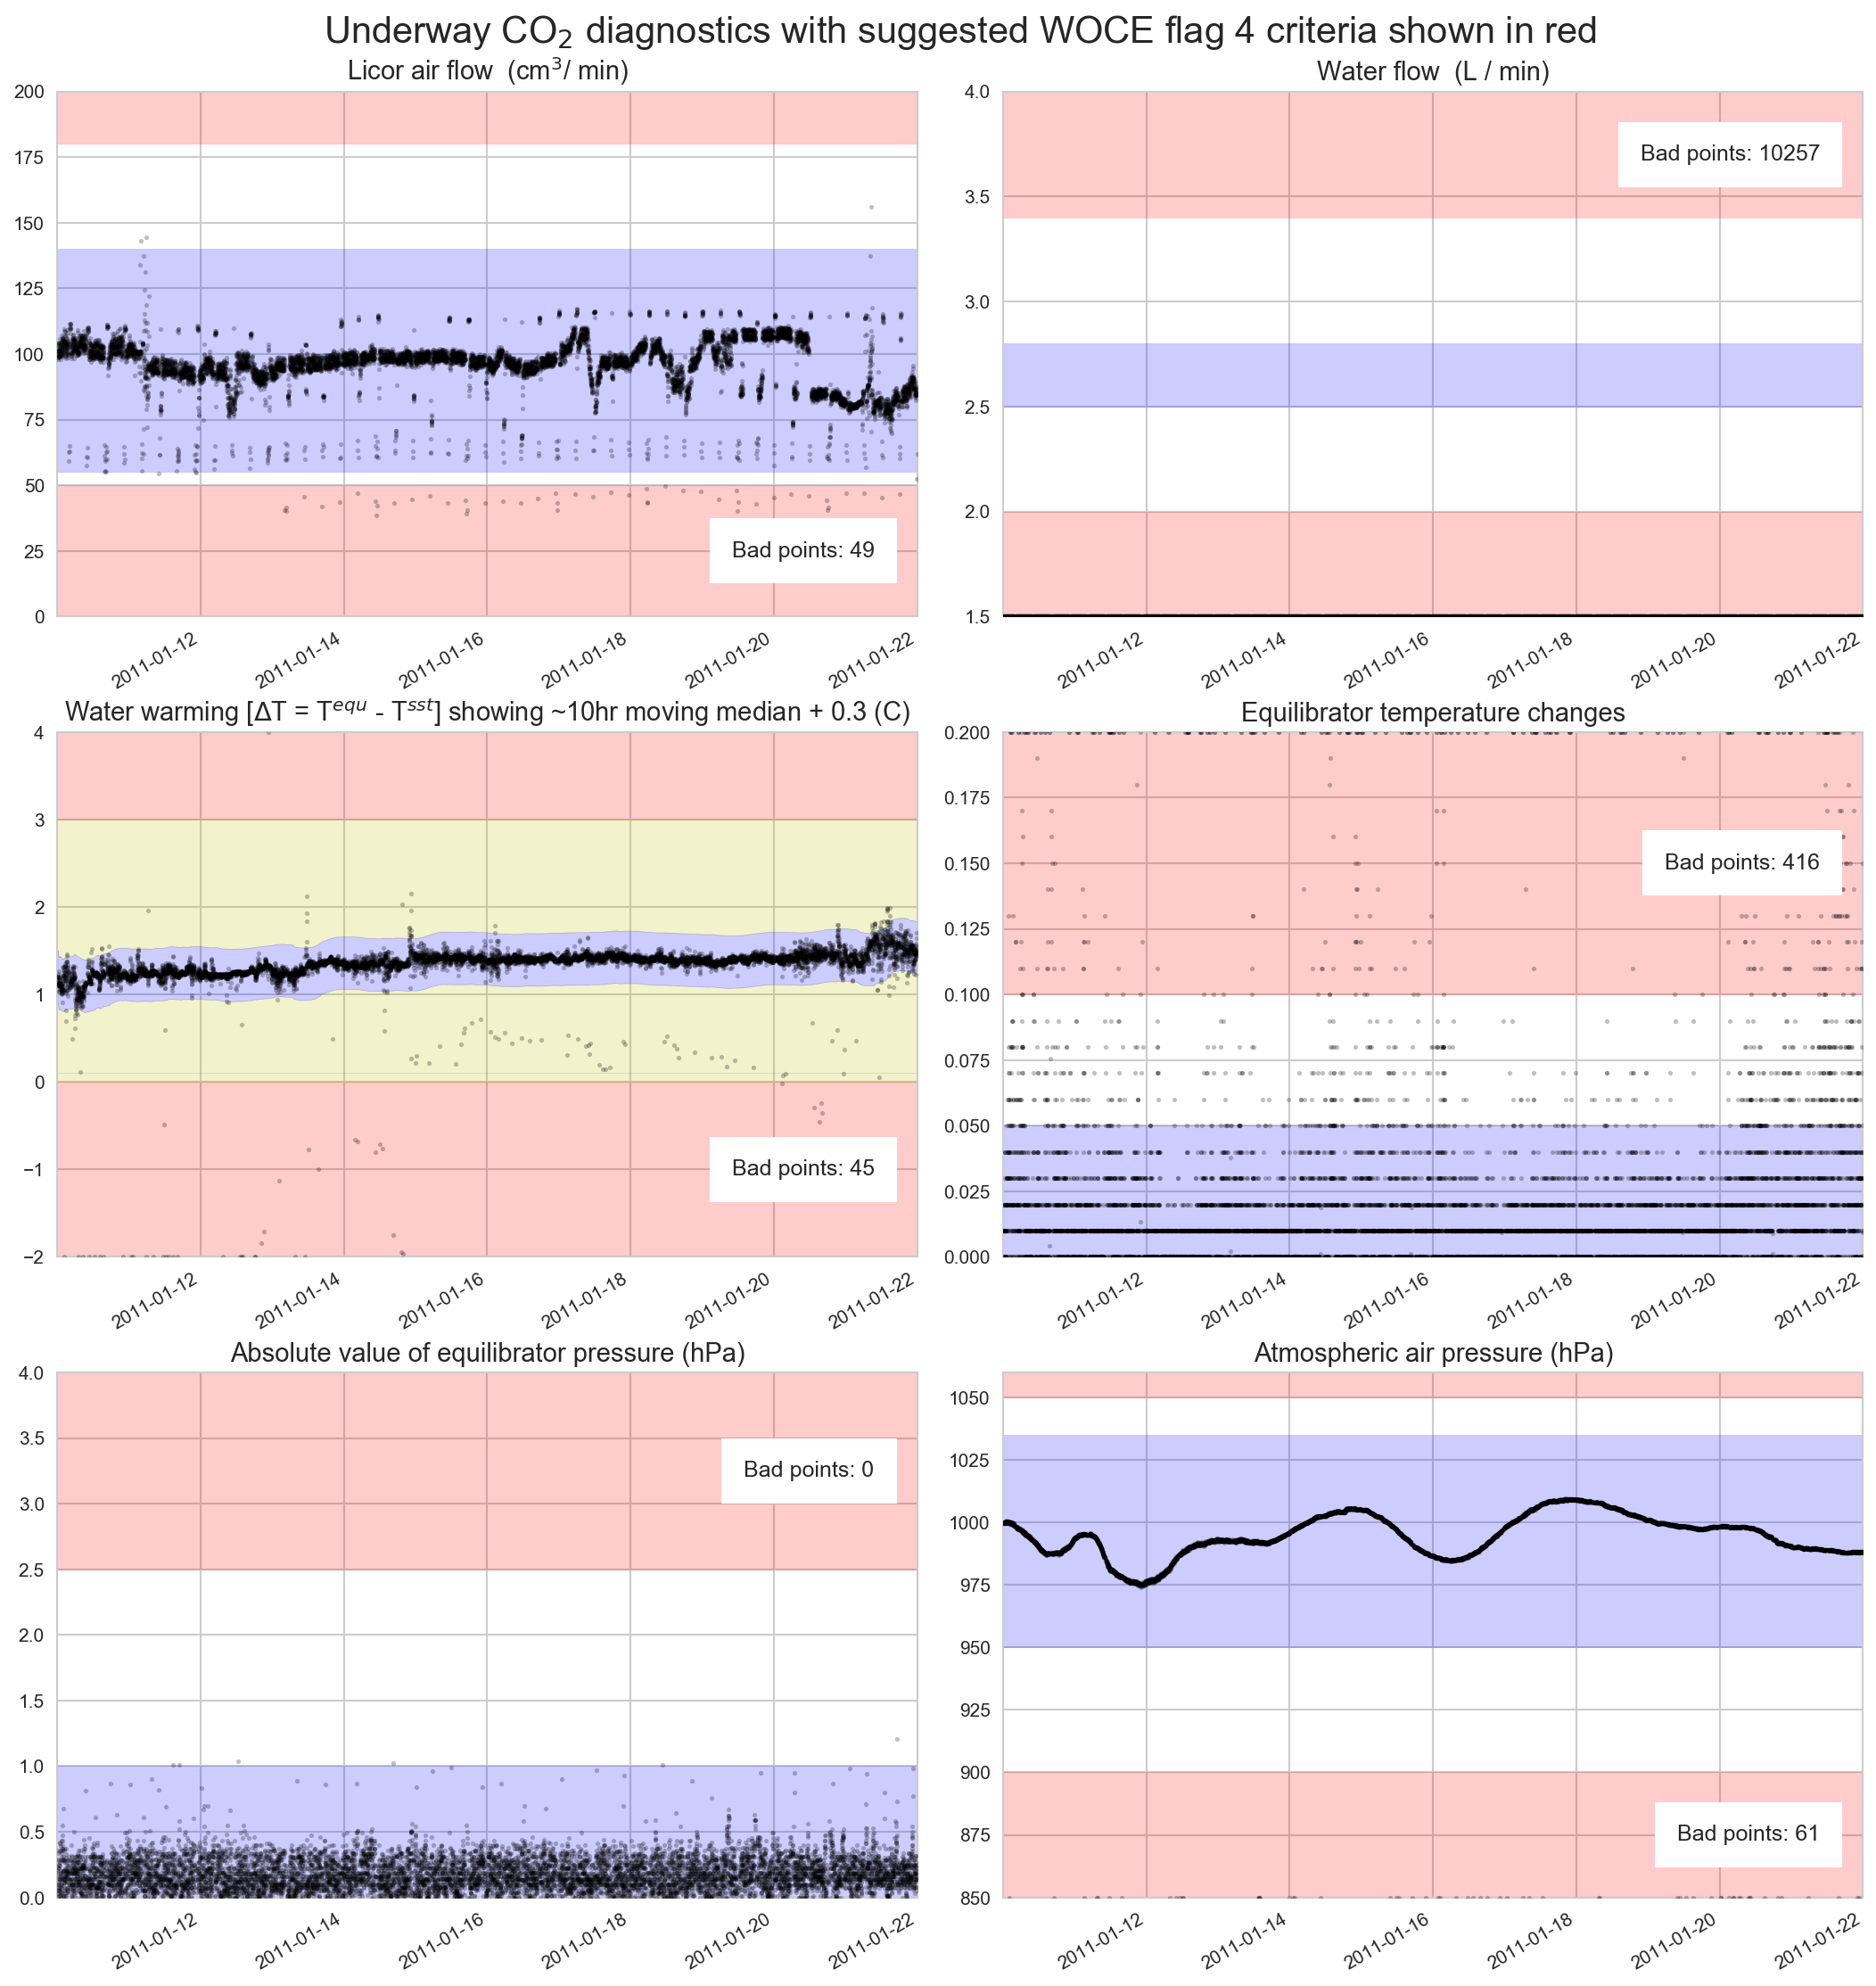

In [171]:
diag_plots.plot_qaulity_control(df2a)
show()

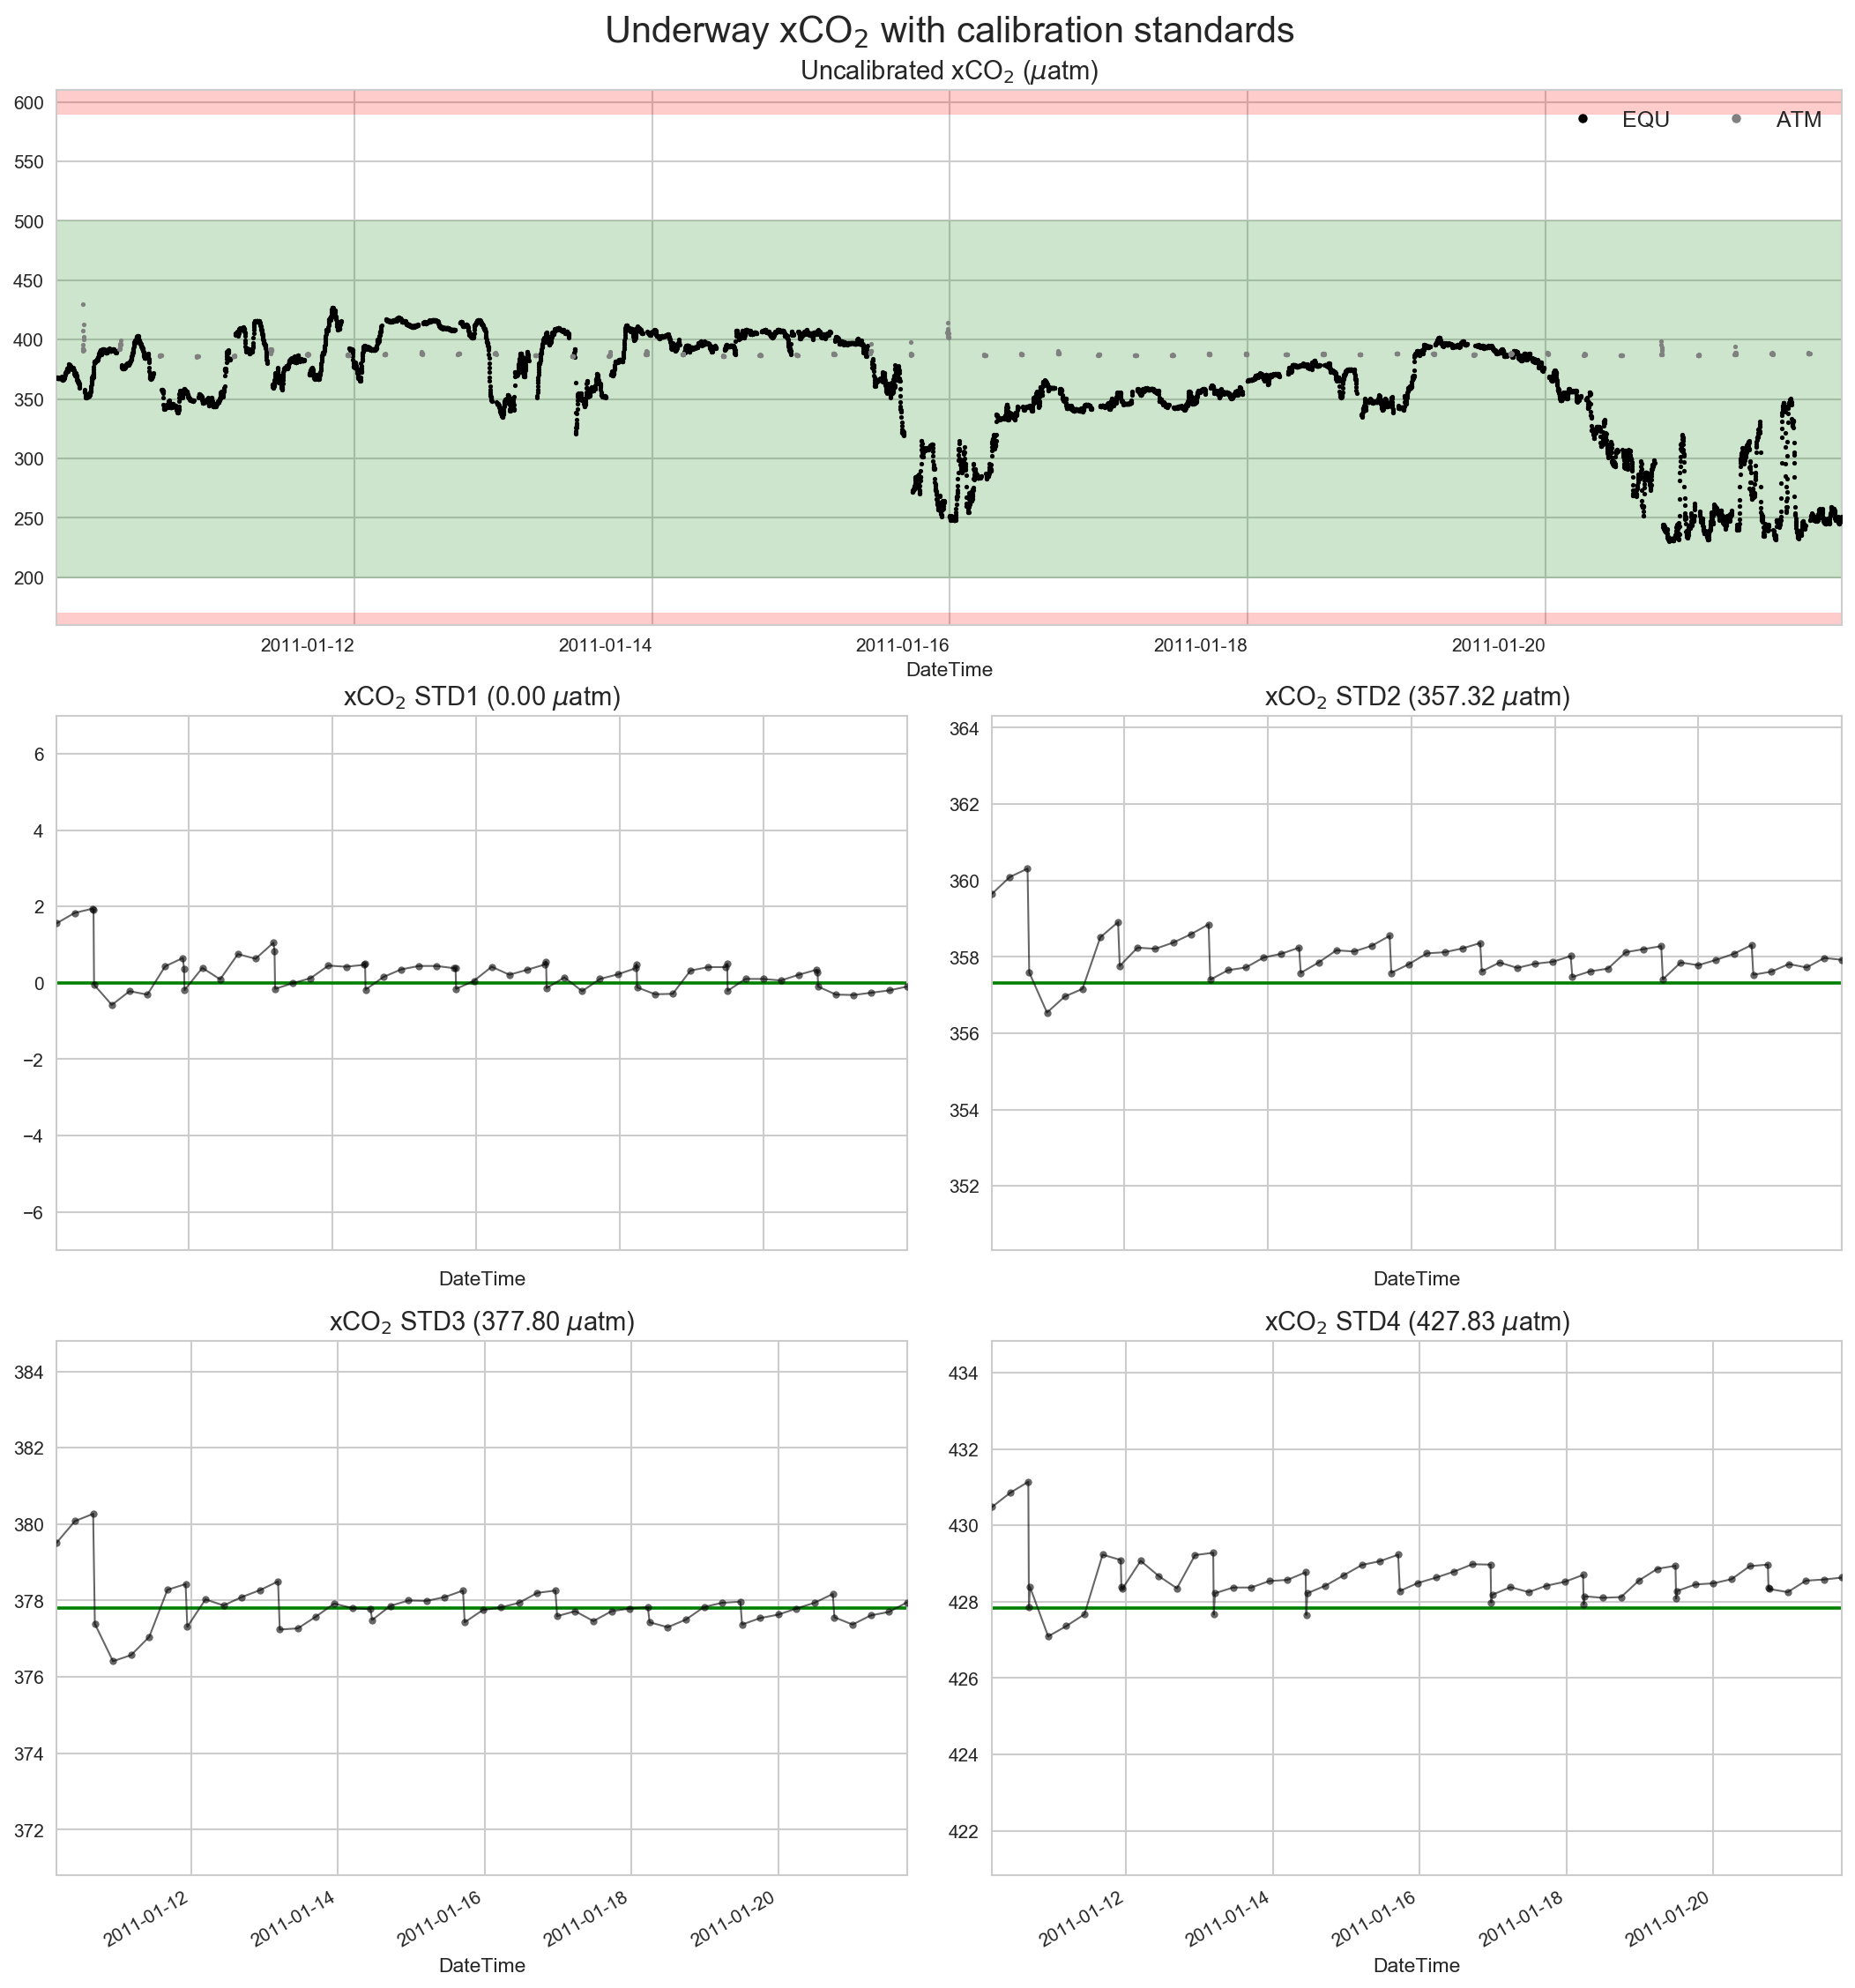

In [173]:
diag_plots.plot_co2_standards(df)
show()

# Oceanic fCO2 estimated in Python is nearly exactly the same as MATLAB

In [137]:
a = df2b.EQU.resample('2min').mean().ffill(limit=1)
b = mtlb.resample('2min').mean().ffill(limit=1)

c = pd.concat([a.CO2f_sst, b['fCO2 water']], axis=1)
c[c < 200] = np.NaN
c.columns = 'Python', 'MATLAB'
d = c.diff(1, 1)['MATLAB']

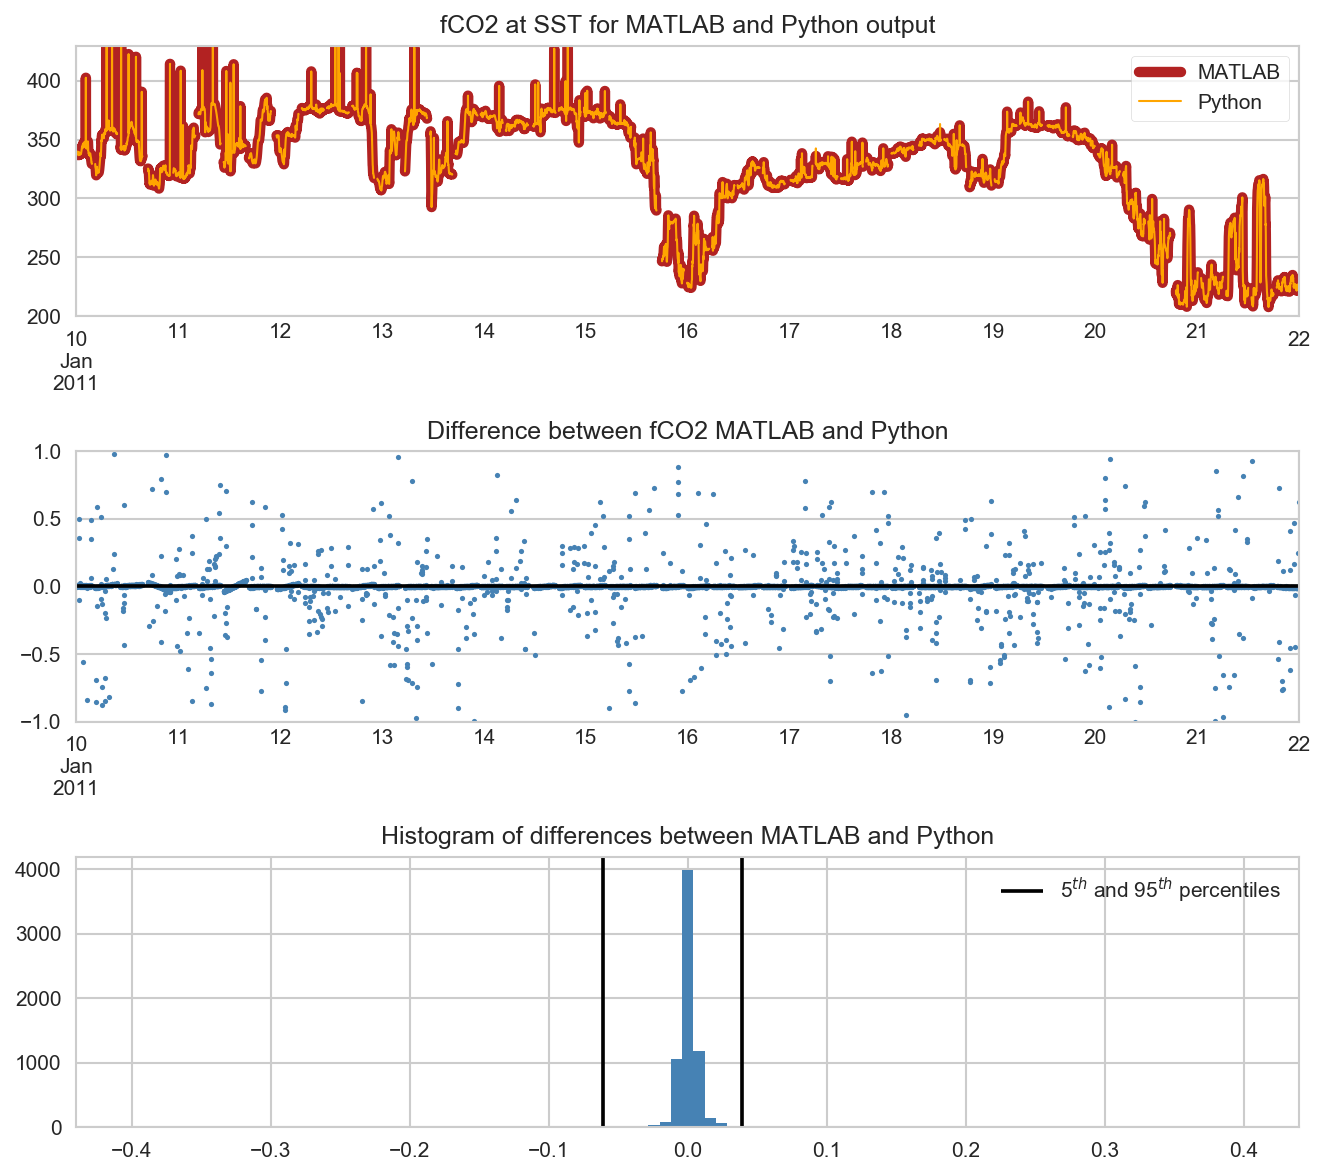

In [139]:
fig, [ax0, ax3, ax2] = subplots(3, 1, figsize=[9, 8])

c.MATLAB.plot(ax=ax0, ylim=[200, 430], lw=5, c='firebrick')
c.Python.plot(ax=ax0, ylim=[200, 430], lw=1, c='orange', grid=1)

d.plot(ax=ax3, marker='.', lw=0, ms=5, color='steelblue', ylim=(-1, 1), grid=1)

d.hist(bins=np.linspace(-.4, .4, 100), color='steelblue', ax=ax2, grid=1)
ylim = ax2.get_ylim()
lim = 0.05
ax2.vlines(d.quantile([0.05, 0.95]), *ax2.get_ylim(), 
           label='5$^{th}$ and 95$^{th}$ percentiles')
ax2.legend()

ax2.set_ylim(ylim)
ax0.legend(loc=0, frameon=1)
ax0.set_xlabel('')
ax0.set_title('fCO2 at SST for MATLAB and Python output')

ax2.set_xlabel('')
ax2.set_title('Histogram of differences between MATLAB and Python')

ax3.set_xlabel('')
ax3.axhline(0, c='k')
ax3.set_title('Difference between fCO2 MATLAB and Python')

tight_layout()

# savefig(figure_sname, bbox_inches='tight', dpi=150, transparent=True)

# Why is atmospheric CO2 different?

## There is a positive bias in the Python fCO2: Pressure height correction

The plot below shows fCO2 for the different calculation methods. 

The data show that the MATLAB script does not correct pressure for the ATM intake height. This results in a 0.5 µatm difference between the height corrected and uncorrected fCO2. To conform to the MATLAB script, the xCO2 to fCO2 calculation, by default, does not correct for height above sea surface level. You can however, correct for this by changing the script. 

2.2 - Water vapour factor from temp and salt
2.2 - Water vapour factor from temp and salt
2.4 - Correcting for non-ideal behaviour of CO2
2.4 - Correcting for non-ideal behaviour of CO2


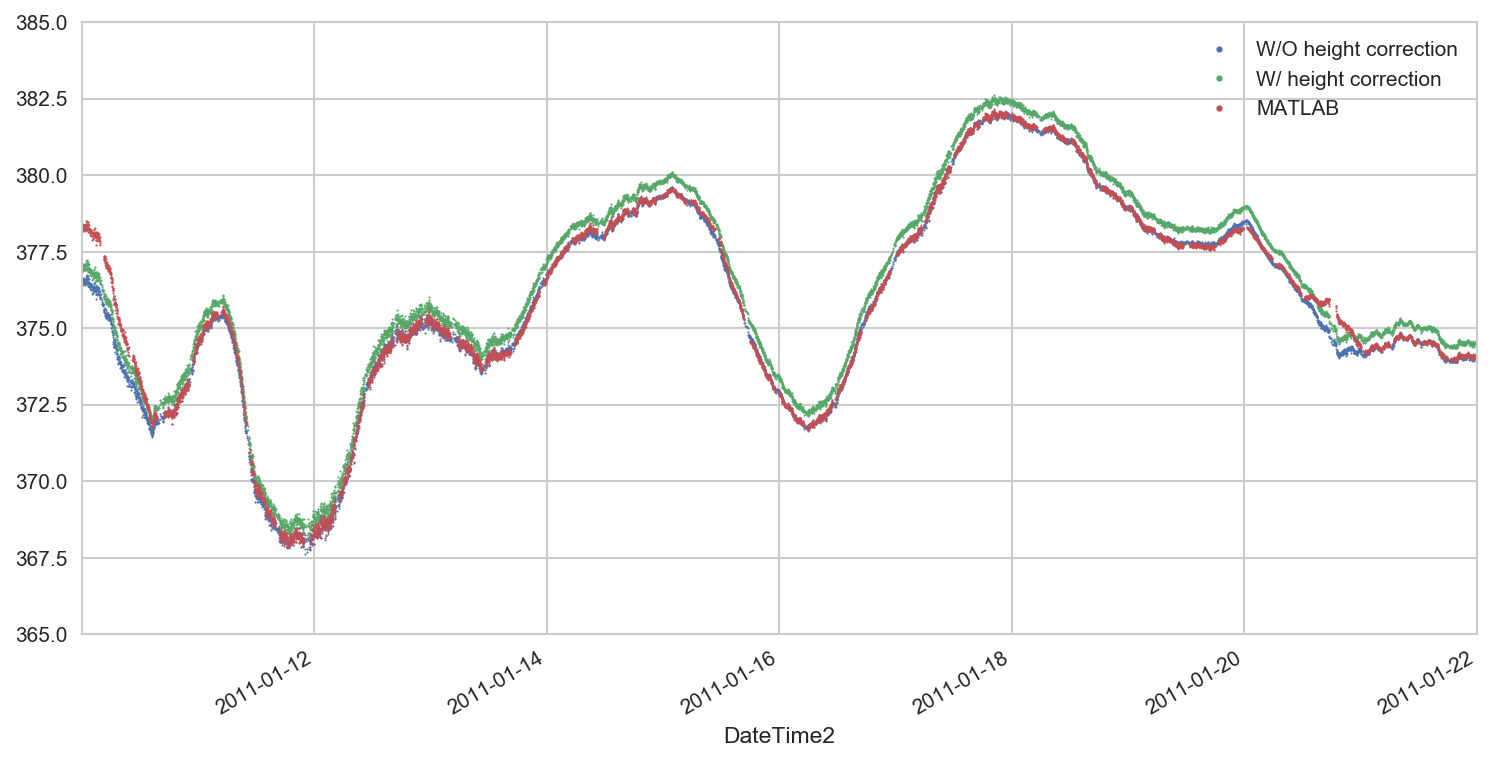

In [144]:
Pres_atm_hpa = df['Pres_atm_hpa']
Pres_ssp_hpa = lev1to2._press_height_correction(Pres_atm_hpa, df['Temp_intake'])

Pres_h20_atm = lev1to2._press_H2O_corrected( Pres_atm_hpa, df['Temp_intake'], df['Salt_tsg']) / 1013.25
Pres_h20_ssp = lev1to2._press_H2O_corrected( Pres_ssp_hpa, df['Temp_intake'], df['Salt_tsg']) / 1013.25

ideal_atm   = lev1to2._ideal_gas_virial_exp( Pres_atm_hpa, df['Temp_intake'], df['CO2x_cor'])
ideal_ssp   = lev1to2._ideal_gas_virial_exp( Pres_ssp_hpa, df['Temp_intake'], df['CO2x_cor'])

CO2x_atm = lev1to2._interpolate_atm_CO2f(df)

CO2f_atm_press_corrected = CO2x_atm * Pres_h20_atm * ideal_fact
CO2f_ssp_press_corrected = CO2x_atm * Pres_h20_ssp * ideal_fact

CO2f_atm_press_corrected.plot(marker='.', ms=2, lw=0, label='W/O height correction')
CO2f_ssp_press_corrected.plot(marker='.', ms=2, lw=0, label='W/ height correction')
mtlb['fCO2 interp'].plot(     marker='.', ms=2, lw=0, label='MATLAB')
gca().set_ylim(365, 385)
legend(markerscale=3)
show()

## xCO2 differences driven by scatter in the ATM measurements

A potential fix to this problem could then be to ignore ATM values when the scatter is large and rather interpolate linearly between coherent groupings.  
Alternatively use the minimum. I'm not quite sure how the MATLAB algorithm does this part.

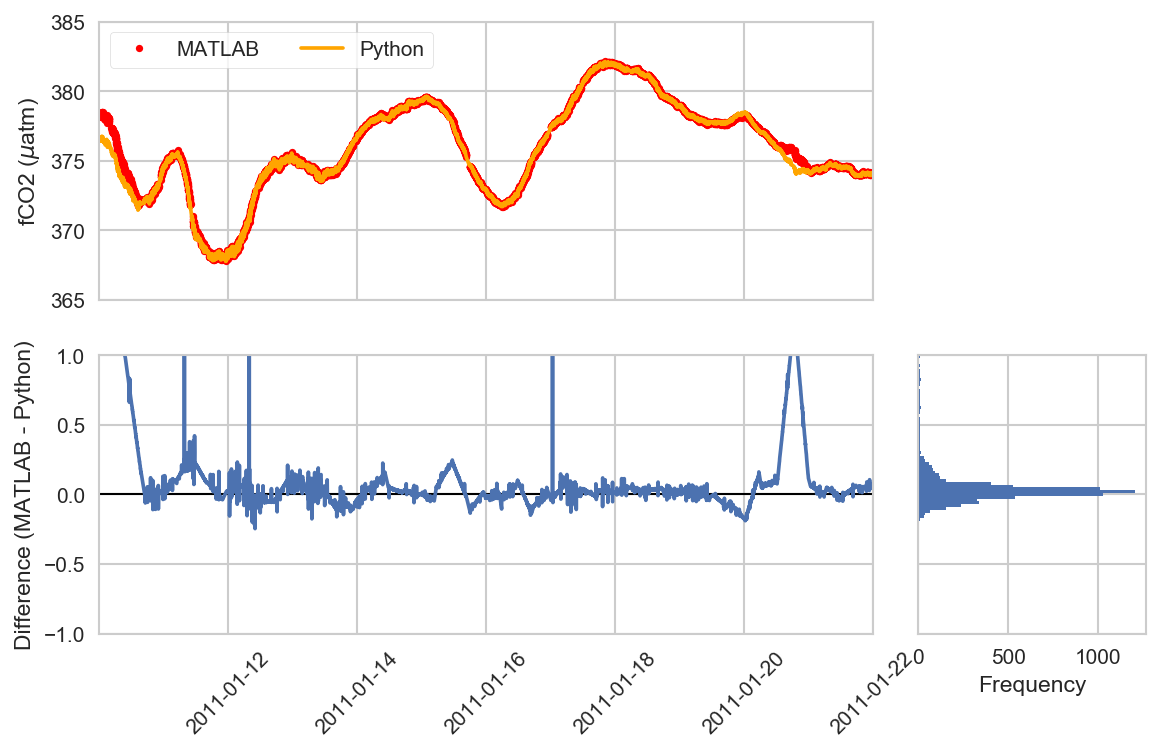

In [145]:
i = b['fCO2 interp'] > 350

k = b.loc[i, 'fCO2 interp'] - a.loc[i, 'CO2f_atm']
x1 = k.index.values
y1 = k.values


fig = figure(figsize=[9, 6])
ax0 = subplot2grid([2, 4], [0, 0], colspan=3)
ax1 = subplot2grid([2, 4], [1, 0], colspan=3)
ax2 = subplot2grid([2, 4], [1, 3], colspan=1)

sca(ax0)
mtlb['fCO2 interp'].plot(lw=0, marker='.', ylim=[365, 385], color='r', label='MATLAB')
pyth.CO2f_atm.plot(color='orange', label='Python')
xticks(xticks()[0], [])
xlabel('')
legend(frameon=1, ncol=2)
ylabel('fCO2 ($\mu$atm)')

sca(ax1)
xticks(rotation=45)
ax1.plot(x1, y1)
ax1.set_ylim(-1, 1)
ax1.set_xlim(ax0.get_xlim())
ax1.axhline(0, color='k', zorder=1, lw=1)
y0, y1 = ax1.get_ylim()
ylabel('Difference (MATLAB - Python)')

k.plot.hist(bins=np.linspace(y0, y1, 100), ax=ax2, orientation='horizontal')
ax2.set_yticklabels([])
ax2.set_ylim(y0, y1)
show()

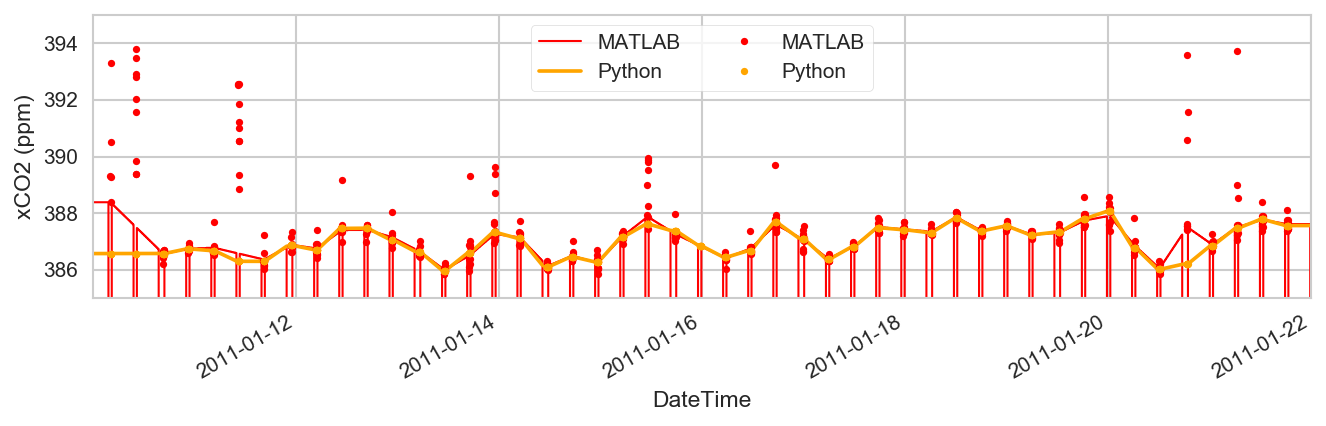

In [143]:
fig, ax = subplots(1, 1, figsize=[9, 3])

sca(ax)
mtlb['xCO2 interp corr'].plot(lw=1, ylim=[385, 395], color='r', label='MATLAB')
pyth.CO2x_atm.plot(color='orange', label='Python')
ylabel('xCO2 (ppm)')

mtlb['xCO2A Corrected'].plot(lw=0, marker='.', ylim=[385, 395], color='r', label='MATLAB')
pyth.loc[pyth.Type=='ATM', 'CO2x_atm'].plot(lw=0, marker='.', color='orange', label='Python')
ylabel('xCO2 (ppm)')
legend(frameon=1, ncol=2)

tight_layout()

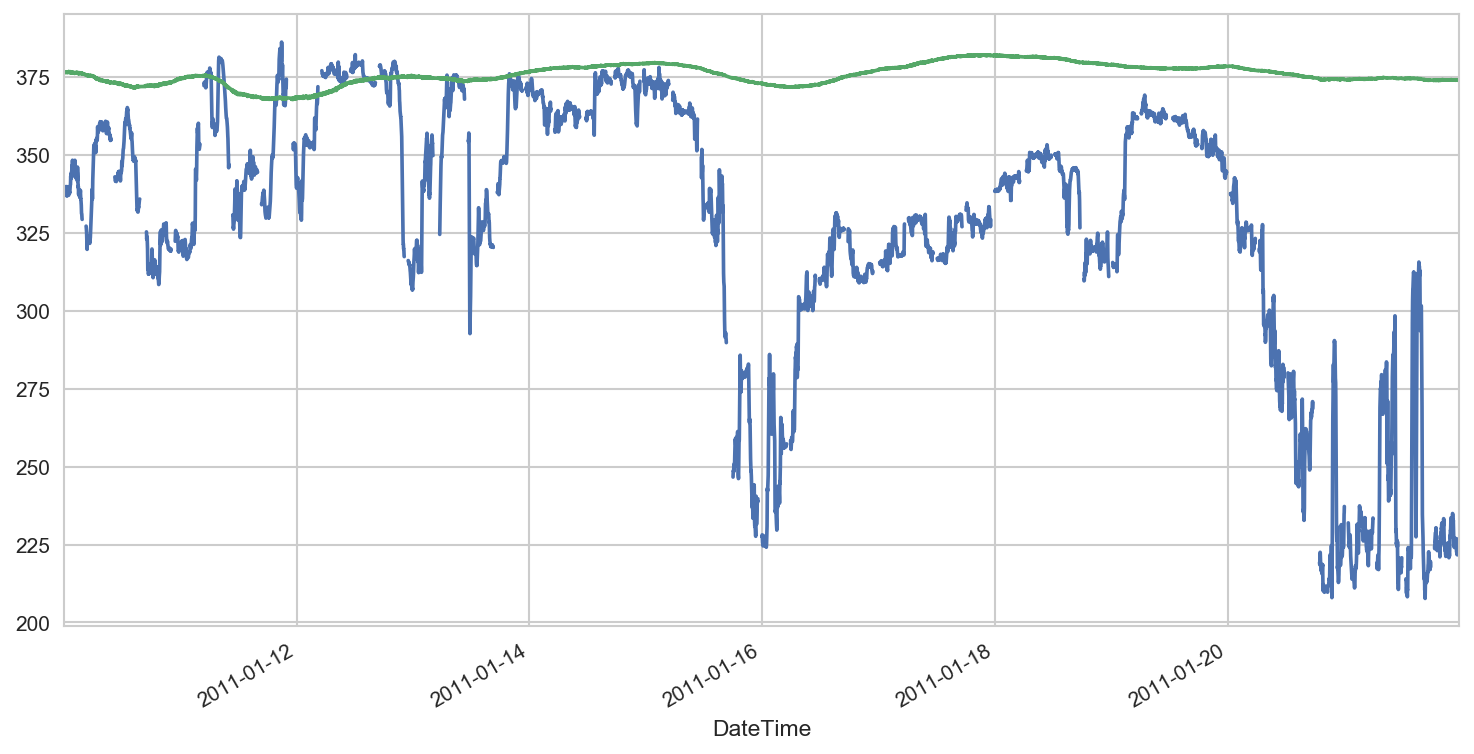

In [147]:
pyth.loc[:, 'CO2f_sst'].plot()
pyth.loc[:, 'CO2f_atm'].plot()